In [41]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("C:\\Users\\HP\\Downloads\\10 pipe dataset.csv")
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [42]:
#Data preparation: We will start pre-processing the dataset by changing the 'Time' column datatype to the 'datetine' datatype.We will then extract the hour of the day feature to prepare the datafor modelling.
df.shape

(12316, 32)

In [43]:
df['Accident_severity'].value_counts()

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64

<Axes: xlabel='Accident_severity'>

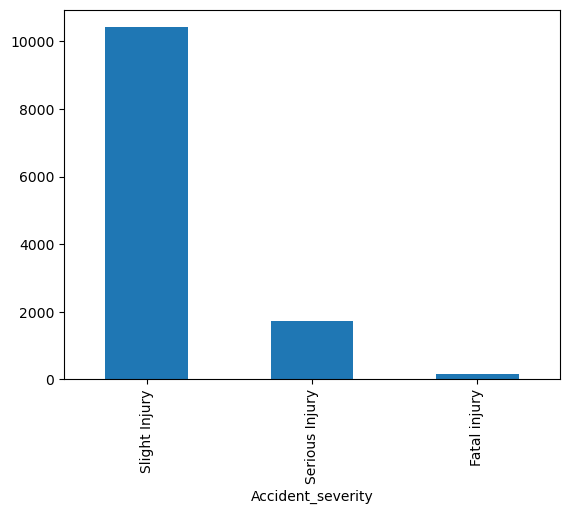

In [44]:
df['Accident_severity'].value_counts().plot(kind='bar')

<Axes: xlabel='Educational_level'>

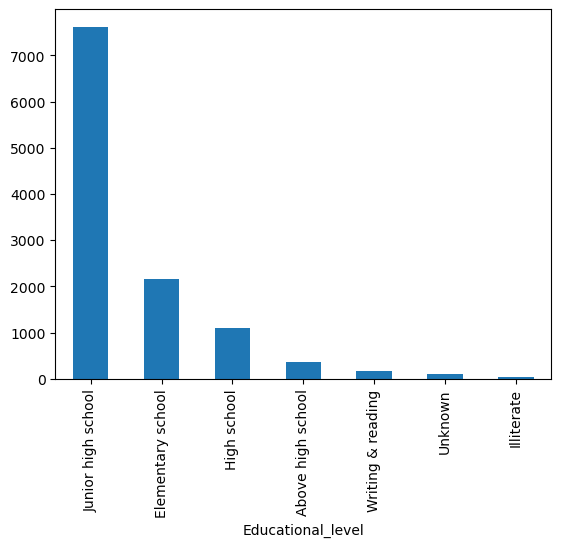

In [45]:
df['Educational_level'].value_counts().plot(kind='bar')

In [46]:
df['Time']

0        17:02:00
1        17:02:00
2        17:02:00
3         1:06:00
4         1:06:00
           ...   
12311    16:15:00
12312    18:00:00
12313    13:55:00
12314    13:55:00
12315    13:55:00
Name: Time, Length: 12316, dtype: object

In [47]:
df['Time']=pd.to_datetime(df['Time'])

C:\Users\HP\AppData\Local\Temp\ipykernel_2544\3907310423.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time']=pd.to_datetime(df['Time'])


In [48]:
df['Hour_of_Day']=df['Time'].dt.hour
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day
0,2025-07-06 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17
1,2025-07-06 17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17
2,2025-07-06 17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,2025-07-06 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,2025-07-06 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,2025-07-06 16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,16
12312,2025-07-06 18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,18
12313,2025-07-06 13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury,13
12314,2025-07-06 13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,13


In [49]:
new_df=df.copy()
new_df.drop('Time',axis=1,inplace=True)
new_df

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,16
12312,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,18
12313,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,...,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury,13
12314,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,13


In [50]:
#Encode Target Column
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
new_df['Accident_severity']=lb.fit_transform(new_df['Accident_severity'])
new_df['Accident_severity'].value_counts()

Accident_severity
2    10415
1     1743
0      158
Name: count, dtype: int64

In [51]:
#balance data
from imblearn.over_sampling import RandomOverSampler
X=new_df.drop(columns=["Accident_severity"])
y=new_df['Accident_severity']
oversampler=RandomOverSampler(random_state=42)
X_resembled,y_resembled=oversampler.fit_resample(X,y)
y_resembled.value_counts()


Accident_severity
2    10415
1    10415
0    10415
Name: count, dtype: int64

In [52]:
#train-test-split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_resembled,y_resembled,test_size=0.2,random_state=42)

In [53]:
#fill missing values
new_df.isnull().sum()

Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality              3198
Fitness_of_casuality        

In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
strategies = {
    3: 'most_frequent',   # Educational_level
    4: 'most_frequent',   # Vehicle_driver_relation
    5: 'most_frequent',   # Driving_experience
    6: 'most_frequent',   # Type_of_vehicle
    8: 'constant',        # Service_year_of_vehicle
    9: 'constant',        # Defect_of_vehicle
    10: 'most_frequent',  # Area_accident_occured
    11: 'most_frequent',  # Lanes_or_Medians
    12: 'most_frequent',  # Road_allignment
    13: 'most_frequent',  # Types_of_Junction
    14: 'most_frequent',  # Road_surface_type
    18: 'most_frequent',  # Type_of_collision
    21: 'most_frequent',  # Vehicle_movement
    26: 'most_frequent',  # Work_of_casuality
    27: 'most_frequent'   # Fitness_of_casuality
}

# Create a ColumnTransformer for data preprocessing
tf1 = ColumnTransformer([
    ('impute_educational_level', SimpleImputer(strategy=strategies[3]), [3]),
    ('impute_Vehicle_driver_relation', SimpleImputer(strategy=strategies[4]), [4]),
    ('impute_Driving_experience', SimpleImputer(strategy=strategies[5]), [5]),
    ('impute_Type_of_vehicle', SimpleImputer(strategy=strategies[6]), [6]),
    ('impute_Service_year_of_vehicle', SimpleImputer(strategy=strategies[8], fill_value='Unknown'), [8]),
    ('impute_Defect_of_vehicle', SimpleImputer(strategy=strategies[9], fill_value='Unknown'), [9]),
    ('impute_Area_accident_occured', SimpleImputer(strategy=strategies[10]), [10]),
    ('impute_Lanes_or_Medians', SimpleImputer(strategy=strategies[11]), [11]),
    ('impute_Road_allignment', SimpleImputer(strategy=strategies[12]), [12]),
    ('impute_Types_of_Junction', SimpleImputer(strategy=strategies[13]), [13]),
    ('impute_Road_surface_type', SimpleImputer(strategy=strategies[14]), [14]),
    ('impute_Type_of_collision', SimpleImputer(strategy=strategies[18]), [18]),
    ('impute_Vehicle_movement', SimpleImputer(strategy=strategies[21]), [21]),
    ('impute_Work_of_casuality', SimpleImputer(strategy=strategies[26]), [26]),
    ('impute_Fitness_of_casuality', SimpleImputer(strategy=strategies[27]), [27])
], remainder='passthrough')


In [37]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Age_band_of_driver           12316 non-null  object
 2   Sex_of_driver                12316 non-null  object
 3   Educational_level            11575 non-null  object
 4   Vehicle_driver_relation      11737 non-null  object
 5   Driving_experience           11487 non-null  object
 6   Type_of_vehicle              11366 non-null  object
 7   Owner_of_vehicle             11834 non-null  object
 8   Service_year_of_vehicle      8388 non-null   object
 9   Defect_of_vehicle            7889 non-null   object
 10  Area_accident_occured        12077 non-null  object
 11  Lanes_or_Medians             11931 non-null  object
 12  Road_allignment              12174 non-null  object
 13  Types_of_Junction            11

In [38]:
new_df

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,2,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,2,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,1,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,2,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,2,16
12312,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,2,18
12313,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,...,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,1,13
12314,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,2,13


In [32]:
#encode categorical columns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define the object columns indices
object_columns_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,19,20,21,22,23,24,25,26,27,28,29,30]

# Create a ColumnTransformer for one-hot encoding only object columns
tf2 = ColumnTransformer([
    (f'ohe_{col}', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), [col])
    for col in object_columns_indices
], remainder='passthrough')

# Apply the transformation
X_train_encoded = tf2.fit_transform(X_train)
X_train_encoded.shape

(24996, 258)

In [ ]:
#Feature selection using the ‘Chi2’ Statistic
#chi2: This is one of the scoring functions available for feature selection in scikit-learn. It calculates the chi-squared statistic between each feature and the target variable (accidents) to determine the relevance of each feature. chi2 is commonly used for feature selection when dealing with categorical target variables.

In [33]:
from sklearn.feature_selection import SelectKBest,chi2
tf4=SelectKBest(chi2,k=50)

In [34]:
#Model(Random Forest Classifier)
from sklearn.ensemble import RandomForestClassifier
tf5=RandomForestClassifier()

In [56]:
#Create Pipeline
from sklearn.pipeline import Pipeline
pipe=Pipeline([
    ('trf1',tf1),
    ('trf2',tf2),
    ('trf4',tf4),
    ('trf5',tf5),
])
#train the pipeline
pipe.fit(X_train,y_train)


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_educational_level',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [3]),
                                                 ('impute_Vehicle_driver_relation',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [4]),
                                                 ('impute_Driving_experience',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [5]),
                                                 ('impute_Type_of_vehicle',
                                                  SimpleImputer(stra...
                                                                sparse_output=False),
                                                  [26]),
                                                 ('ohe_27',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [27]),
                                                 ('ohe_28',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [28]),
                                                 ('ohe_29',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [29]), ...])),
                ('trf4',
                 SelectKBest(k=50,
                             score_func=<function chi2 at 0x000001B6E4787380>)),
                ('trf5', RandomForestClassifier())])

In [57]:
pipe.get_feature_names_out

<bound method Pipeline.get_feature_names_out of Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_educational_level',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [3]),
                                                 ('impute_Vehicle_driver_relation',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [4]),
                                                 ('impute_Driving_experience',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [5]),
                                                 ('impute_Type_of_vehicle',
                                                  SimpleImputer(stra...
                                     

In [58]:
#accuracy score
from sklearn.metrics import accuracy_score
y_pred=pipe.predict(X_test)
accuracy_score(y_test,y_pred)

0.9241478636581854

In [60]:

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2085
           1       0.85      0.95      0.90      2100
           2       0.96      0.82      0.88      2064

    accuracy                           0.92      6249
   macro avg       0.93      0.92      0.92      6249
weighted avg       0.93      0.92      0.92      6249



In [61]:
#confusion matrix: evaluate the performance of classification.It helps you understand how well your model is doing beyond just accuracy.
#It is the table that compares the actual labels (true values) vs the predicted labels from your model.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[2085,    0,    0],
       [  22, 2002,   76],
       [  28,  348, 1688]], dtype=int64)

In [64]:
#save pipe
import pickle
pickle.dump(pipe,open("10 pipe.pkl",'wb'))

In [70]:

import numpy as np
def pred(Day_of_week, Age_band_of_driver, Sex_of_driver, Educational_level, Vehicle_driver_relation,
         Driving_experience, Type_of_vehicle, Owner_of_vehicle, Service_year_of_vehicle,
         Defect_of_vehicle, Area_accident_occured, Lanes_or_Medians, Road_allignment,
         Types_of_Junction, Road_surface_type, Road_surface_conditions, Light_conditions,
         Weather_conditions, Type_of_collision, Number_of_vehicles_involved,
         Number_of_casualties, Vehicle_movement, Casualty_class, Sex_of_casualty,
         Age_band_of_casualty, Casualty_severity, Work_of_casuality, Fitness_of_casuality,
         Pedestrian_movement, Cause_of_accident, Hour_of_Day):
    
    # Your prediction code here
    features = np.array([[Day_of_week, Age_band_of_driver, Sex_of_driver, Educational_level, Vehicle_driver_relation,
         Driving_experience, Type_of_vehicle, Owner_of_vehicle, Service_year_of_vehicle,
         Defect_of_vehicle, Area_accident_occured, Lanes_or_Medians, Road_allignment,
         Types_of_Junction, Road_surface_type, Road_surface_conditions, Light_conditions,
         Weather_conditions, Type_of_collision, Number_of_vehicles_involved,
         Number_of_casualties, Vehicle_movement, Casualty_class, Sex_of_casualty,
         Age_band_of_casualty, Casualty_severity, Work_of_casuality, Fitness_of_casuality,
         Pedestrian_movement, Cause_of_accident, Hour_of_Day]])
    
    results = pipe.predict(features)
    return results

In [71]:
#test case

predicted_class = pred(Day_of_week="Thursday", 
                                Age_band_of_driver='31-50',
                                Sex_of_driver='Male',
                                Educational_level='Junior high school',
                                Vehicle_driver_relation='Owner',
                                Driving_experience=None,
                                Type_of_vehicle='Long lorry',
                                Owner_of_vehicle='Owner',
                                Service_year_of_vehicle='Unknown',
                                Defect_of_vehicle=None,
                                Area_accident_occured='Other',
                                Lanes_or_Medians='Two-way (divided with solid lines road marking)',
                                Road_allignment='Tangent road with flat terrain',
                                Types_of_Junction=None,
                                Road_surface_type=None,
                                Road_surface_conditions='Dry',
                                Light_conditions='Daylight',
                                Weather_conditions='Normal',
                                Type_of_collision='Collision with animals',
                                Number_of_vehicles_involved=2,
                                Number_of_casualties=1,
                                Vehicle_movement='Going straight',
                                Casualty_class='Driver or rider',
                                Sex_of_casualty='Male',
                                Age_band_of_casualty='18-30',
                                Casualty_severity=3,
                                Work_of_casuality='Driver',
                                Fitness_of_casuality='Normal',
                                Pedestrian_movement='Not a Pedestrian',
                                Cause_of_accident='Changing lane to the left',
                                Hour_of_Day=12)

if predicted_class[0] == 2:
    print("Slight Injury.....")
elif predicted_class[0] == 1:
    print("Serious Injury")
else:
    print("Fatal Injury")

Serious Injury


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid featur